<a href="https://colab.research.google.com/github/wiss0212/Video_streaming_churn/blob/main/Project_video_streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!git clone https://github.com/wiss0212/Video_streaming_churn.git


fatal: destination path 'Video_streaming_churn' already exists and is not an empty directory.
fatal: destination path 'Video_streaming_churn' already exists and is not an empty directory.


# **importing neccessary packages**

In [48]:
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from jupyter_datatables import init_datatables_mode


#**Importing Data**

In [49]:
path_train="/content/drive/MyDrive/data_coursera/Files/Files/home/jovyan/work/train.csv"
train_df=pd.read_csv(path_train)
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [50]:
path_test="/content/drive/MyDrive/data_coursera/Files/Files/home/jovyan/work/test.csv"
test_df=pd.read_csv(path_test)
test_df.head()


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


# **Exploratory Data Analysis (EDA)**

In [51]:
nan_values = train_df.isna().sum()
print("NaN values count per column:")
print(nan_values)

NaN values count per column:
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64


In [52]:
# Check for negative values in the DataFrame
numeric_columns = train_df.select_dtypes(include=['number'])
negative_values_mask = numeric_columns< 0
negative_values_count = negative_values_mask.sum()
print("Columns with negative values and their counts:")
print(negative_values_count[negative_values_count > 0])

Columns with negative values and their counts:
Series([], dtype: int64)


In [53]:
mean_age = train_df['AccountAge'].mean()
print(mean_age)
empty_values = train_df.isnull().any()
print(empty_values)


60.083757542444836
AccountAge                  False
MonthlyCharges              False
TotalCharges                False
SubscriptionType            False
PaymentMethod               False
PaperlessBilling            False
ContentType                 False
MultiDeviceAccess           False
DeviceRegistered            False
ViewingHoursPerWeek         False
AverageViewingDuration      False
ContentDownloadsPerMonth    False
GenrePreference             False
UserRating                  False
SupportTicketsPerMonth      False
Gender                      False
WatchlistSize               False
ParentalControl             False
SubtitlesEnabled            False
CustomerID                  False
Churn                       False
dtype: bool


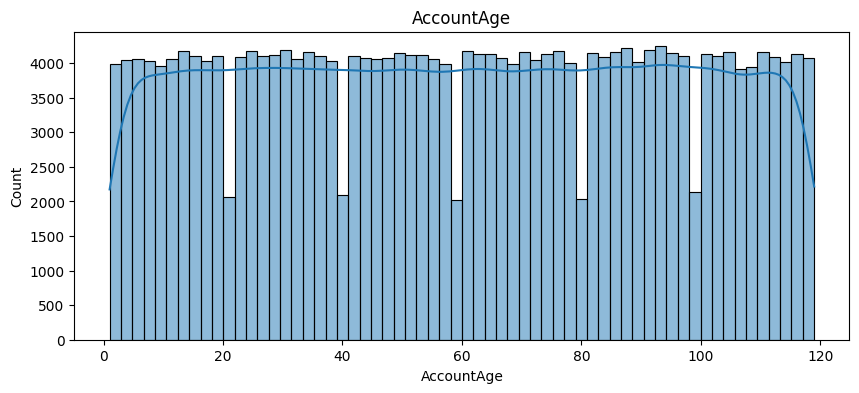

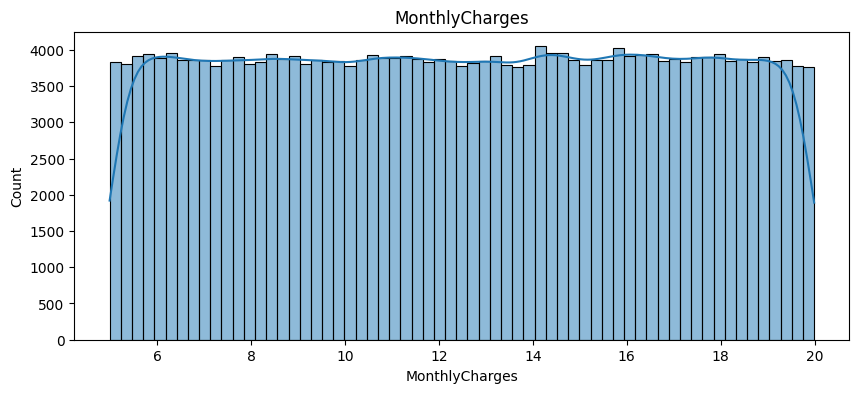

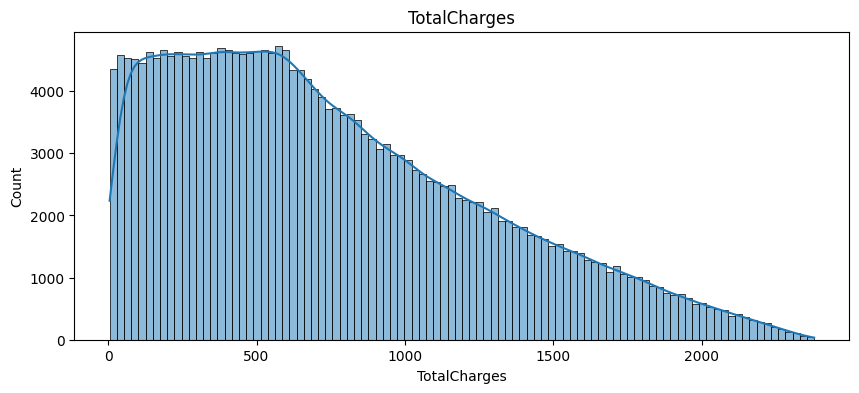

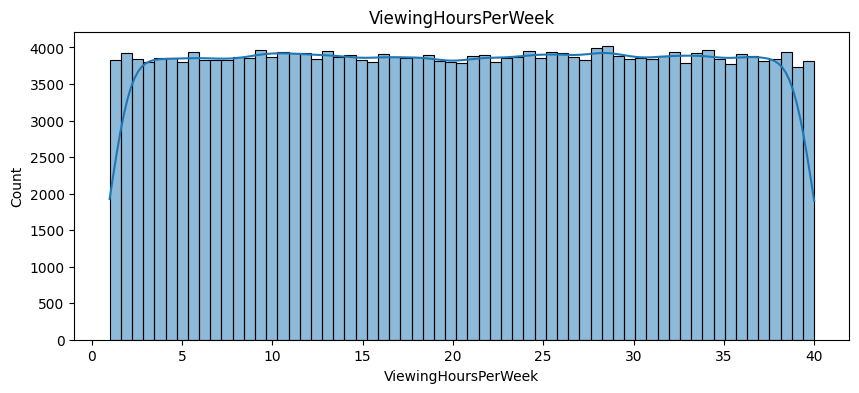

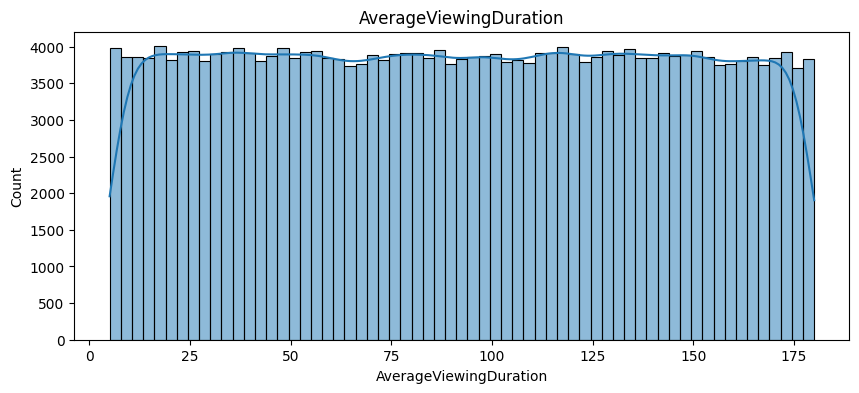

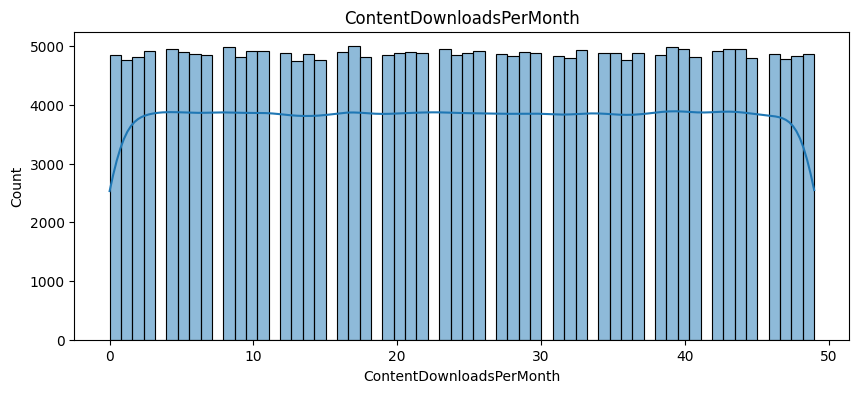

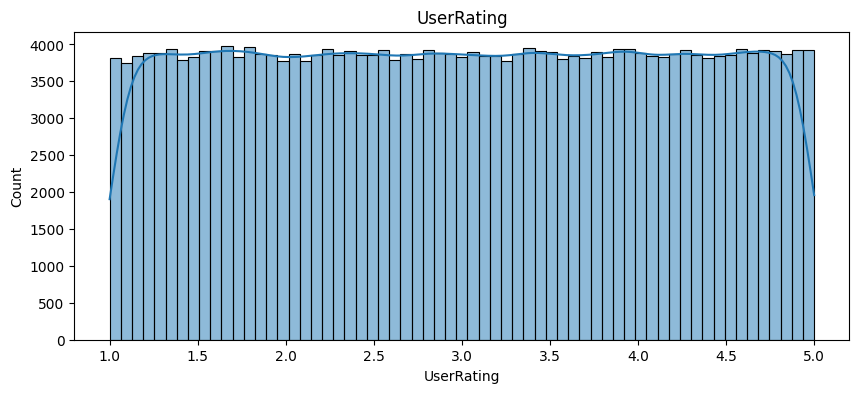

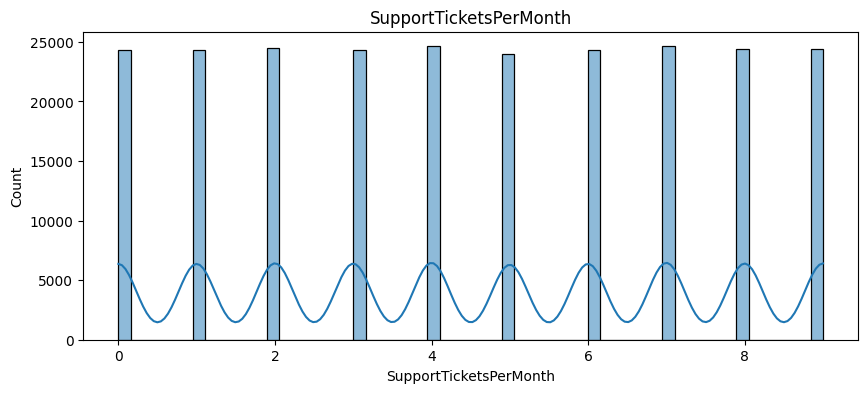

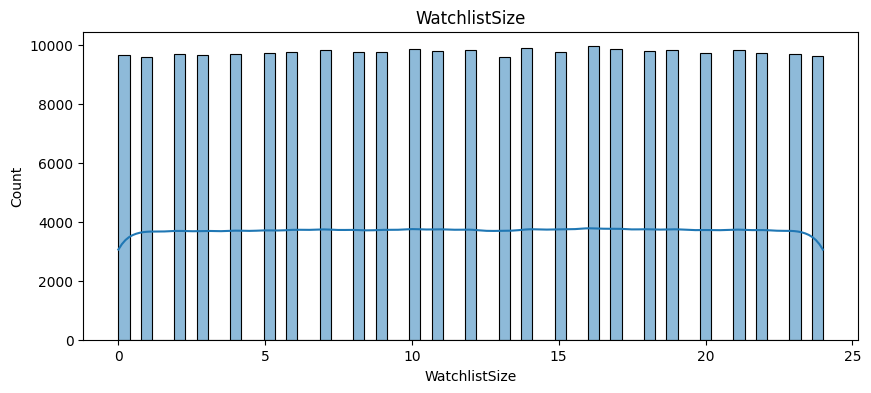

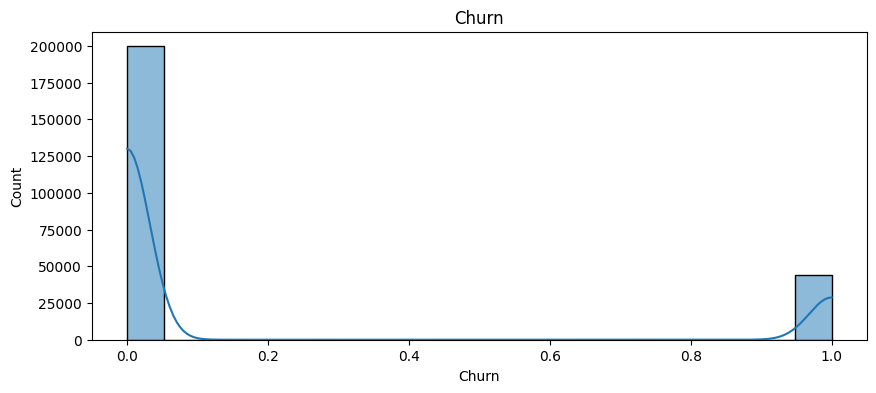

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in train_df.columns:
    if train_df[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 4))
        sns.histplot(train_df[column], kde=True)
        plt.title(column)
        plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Transformation logarithmique
train_df['TotalCharges_Log'] = np.log1p(train_df['TotalCharges'])

# Normalisation
scaler = StandardScaler()
train_df['TotalCharges'] = scaler.fit_transform(train_df[['MonthlyCharges']])


2024-04-14 12:22:32,403 [21828] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



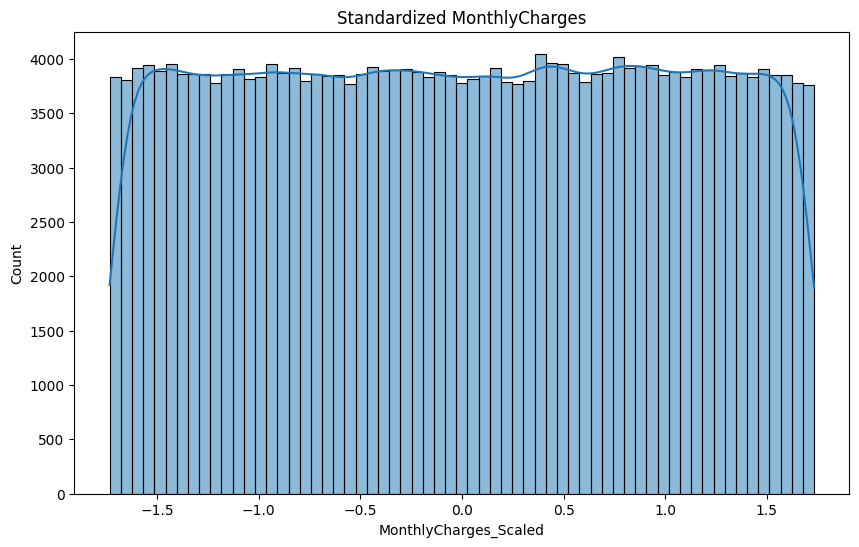

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['TotalCharges'], kde=True)
plt.title('Standardized MonthlyCharges')
plt.xlabel('MonthlyCharges_Scaled')
plt.ylabel('Count')
plt.show()

In [82]:
del train_df['TotalCharges_Log']

In [83]:
nan_values = train_df.isna().sum()
print("NaN values count per column:")
print(nan_values)

NaN values count per column:
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64


In [85]:
df_majority = train_df[train_df['Churn'] == 0]
df_minority = train_df[train_df['Churn'] == 1]

# Oversample minority class
df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True)  # Sample with replacement

# Combine majority class with oversampled minority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Display new class distribution
print("New class distribution after manual oversampling:")
print(df_oversampled['Churn'].value_counts())


New class distribution after manual oversampling:
Churn
0    199605
1    199605
Name: count, dtype: int64


In [86]:
df_oversampled

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,-0.331703,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,-1.690423,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,-0.088741,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,-1.207816,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,1.031143,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111356,1,18.705038,1.435977,Premium,Mailed check,No,TV Shows,No,Mobile,7.300045,...,4,Action,1.607901,5,Female,21,No,Yes,6W6MYJS7N3,1
5564,25,6.460703,-1.393378,Standard,Electronic check,Yes,Movies,Yes,Tablet,32.957002,...,15,Sci-Fi,2.980380,5,Female,8,No,Yes,ZAUCMPJG2U,1
41387,83,12.169516,-0.074216,Standard,Credit card,No,Movies,Yes,Tablet,1.202271,...,43,Drama,3.958753,4,Female,2,No,Yes,T13Y6VVJX5,1
200501,22,12.852891,0.083695,Basic,Electronic check,Yes,Both,No,Mobile,10.236367,...,3,Comedy,1.693623,7,Male,5,Yes,Yes,55LAKZPSP7,1


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Churn'], kde=True)
plt.title('Standardized MonthlyCharges')
plt.xlabel('MonthlyCharges_Scaled')
plt.ylabel('Count')
plt.show()

In [91]:
X_train_df = df_oversampled.drop(['Churn','CustomerID'], axis=1)  # Features
X_train_df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled
0,20,11.055215,-0.331703,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No
1,57,5.175208,-1.690423,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes
2,73,12.106657,-0.088741,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes
3,32,7.263743,-1.207816,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes
4,57,16.953078,1.031143,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111356,1,18.705038,1.435977,Premium,Mailed check,No,TV Shows,No,Mobile,7.300045,46.615939,4,Action,1.607901,5,Female,21,No,Yes
5564,25,6.460703,-1.393378,Standard,Electronic check,Yes,Movies,Yes,Tablet,32.957002,135.761499,15,Sci-Fi,2.980380,5,Female,8,No,Yes
41387,83,12.169516,-0.074216,Standard,Credit card,No,Movies,Yes,Tablet,1.202271,121.240213,43,Drama,3.958753,4,Female,2,No,Yes
200501,22,12.852891,0.083695,Basic,Electronic check,Yes,Both,No,Mobile,10.236367,99.324104,3,Comedy,1.693623,7,Male,5,Yes,Yes


In [101]:
Y_train =df_oversampled['Churn'] # targets
Y_train_df=pd.DataFrame(Y_train)
Y_train_df



,Churn
0,0
1,0
2,0
3,0
4,0
...,...
111356,1
5564,1
41387,1
200501,1


from matplotlib import pyplot as plt
Y_train_df['Churn'].plot(kind='hist', bins=20, title='Churn')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Churn']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Churn'}, axis=1)
              .sort_values('Churn', ascending=True))
  xs = counted['Churn']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Y_train_df.sort_values('Churn', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Churn')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
Y_train_df['Churn'].plot(kind='line', figsize=(8, 4), title='Churn')
plt.gca().spines[['top', 'right']].set_visible(False)

In [63]:
X_test = test_df.drop(('CustomerID'), axis=1)  # Features
X_test

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,80,17.348236,1387.858873,Standard,Credit card,No,TV Shows,Yes,Mobile,19.189141,135.445204,35,Comedy,1.411831,7,Female,14,No,Yes
104476,20,8.275459,165.509180,Premium,Bank transfer,Yes,Movies,Yes,Mobile,30.986604,114.868640,17,Drama,2.783849,2,Male,8,Yes,No
104477,106,18.134343,1922.240365,Basic,Mailed check,No,Movies,Yes,Computer,7.236303,109.583153,31,Comedy,2.991527,1,Male,12,No,Yes
104478,46,19.774010,909.604454,Basic,Bank transfer,No,TV Shows,Yes,TV,25.809285,115.153570,1,Drama,4.998019,0,Female,12,Yes,No


In [64]:
id_test=test_df['CustomerID']
id_test

0         O1W6BHP6RM
1         LFR4X92X8H
2         QM5GBIYODA
3         D9RXTK2K9F
4         ENTCCHR1LR
             ...    
104475    UTKREC613O
104476    MDB4E477PS
104477    IPDIA02ZE1
104478    ITLFTPRJGV
104479    Y204GZY6NE
Name: CustomerID, Length: 104480, dtype: object

In [103]:
# Encode the 'Category' column
train_columns_category=X_train_df.select_dtypes(include=['object', 'category']).columns
train_columns_category

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled'],
      dtype='object')

In [104]:
X_train_encoded=pd.get_dummies(X_train_df,columns=train_columns_category)
X_train_encoded

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,20,11.055215,-0.331703,36.758104,63.531377,10,2.176498,4,3,False,...,False,False,False,True,False,True,True,False,True,False
1,57,5.175208,-1.690423,32.450568,25.725595,18,3.478632,8,23,True,...,False,False,False,False,False,True,True,False,False,True
2,73,12.106657,-0.088741,7.395160,57.364061,23,4.238824,6,1,True,...,False,False,True,False,False,True,False,True,False,True
3,32,7.263743,-1.207816,27.960389,131.537507,30,4.276013,2,24,True,...,False,True,False,False,False,True,False,True,False,True
4,57,16.953078,1.031143,20.083397,45.356653,20,3.616170,4,0,False,...,True,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111356,1,18.705038,1.435977,7.300045,46.615939,4,1.607901,5,21,False,...,False,False,False,False,True,False,True,False,False,True
5564,25,6.460703,-1.393378,32.957002,135.761499,15,2.980380,5,8,False,...,False,False,False,True,True,False,True,False,False,True
41387,83,12.169516,-0.074216,1.202271,121.240213,43,3.958753,4,2,False,...,False,True,False,False,True,False,True,False,False,True
200501,22,12.852891,0.083695,10.236367,99.324104,3,1.693623,7,5,True,...,True,False,False,False,False,True,False,True,False,True


In [105]:
test_columns_category=X_test.select_dtypes(include=['object', 'category']).columns
test_columns_category

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled'],
      dtype='object')

In [106]:
X_test_encoded=pd.get_dummies(X_test,columns=test_columns_category)
X_test_encoded

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,38,17.869374,679.036195,29.126308,122.274031,42,3.522724,2,23,False,...,True,False,False,False,False,True,True,False,True,False
1,77,9.912854,763.289768,36.873729,57.093319,43,2.021545,2,22,True,...,False,False,False,False,True,False,False,True,True,False
2,5,15.019011,75.095057,7.601729,140.414001,14,4.806126,2,22,False,...,False,False,False,True,True,False,True,False,False,True
3,88,15.357406,1351.451692,35.586430,177.002419,14,4.943900,0,23,False,...,True,False,False,False,True,False,False,True,False,True
4,91,12.406033,1128.949004,23.503651,70.308376,6,2.846880,6,0,False,...,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,80,17.348236,1387.858873,19.189141,135.445204,35,1.411831,7,14,False,...,True,False,False,False,True,False,True,False,False,True
104476,20,8.275459,165.509180,30.986604,114.868640,17,2.783849,2,8,False,...,False,True,False,False,False,True,False,True,True,False
104477,106,18.134343,1922.240365,7.236303,109.583153,31,2.991527,1,12,True,...,True,False,False,False,False,True,True,False,False,True
104478,46,19.774010,909.604454,25.809285,115.153570,1,4.998019,0,12,True,...,False,True,False,False,True,False,False,True,True,False


In [120]:

# Calculate the correlation matrix
corr_matrix = X_train_encoded.corr()
# Sélectionner la partie supérieure de la matrice de corrélation, car elle est miroir.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))


# Trouver les paires de features avec une corrélation supérieure à un seuil (par exemple, 0.5)
threshold = 0.5
highly_correlated_features = [(column, row) for column in upper.columns for row in upper.index if abs(upper[column][row]) > threshold]
print("Paires de features corrélées:", highly_correlated_features)


Paires de features corrélées: [('TotalCharges', 'MonthlyCharges'), ('SubscriptionType_Standard', 'SubscriptionType_Basic'), ('PaperlessBilling_Yes', 'PaperlessBilling_No'), ('ContentType_Movies', 'ContentType_Both'), ('ContentType_TV Shows', 'ContentType_Both'), ('MultiDeviceAccess_Yes', 'MultiDeviceAccess_No'), ('Gender_Male', 'Gender_Female'), ('ParentalControl_Yes', 'ParentalControl_No'), ('SubtitlesEnabled_Yes', 'SubtitlesEnabled_No')]


In [139]:
x_train, x_val, y_train, y_val = train_test_split(X_train_encoded,Y_train_df , test_size=0.2, random_state=42)

In [140]:
logistic_reg = LogisticRegression()

In [141]:
logistic_reg.fit(x_train, y_train)

2024-04-14 14:43:45,632 [21828] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

2024-04-14 14:43:52,120 [21828] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogisticRegression()

In [142]:
y_prob=logistic_reg.predict_proba(x_val)[:,1]

In [143]:
roc_auc=roc_auc_score(y_val,y_prob)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.7508431235588813
